In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
np.concatenate(([0], A))

array([0, 1, 2, 3])

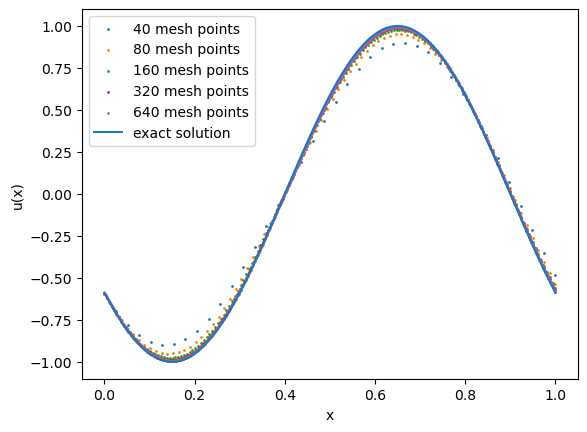

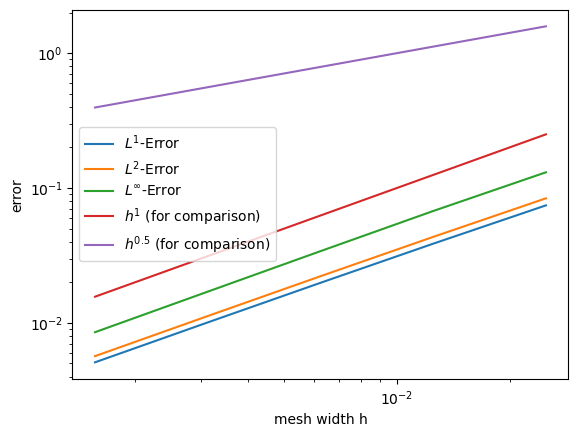

L1 average convergence rate: 0.9672484334583885
L2 average convergence rate: 0.9725283424661596
Linf average convergence rate: 0.9865257789248094
N=40
L1 Error at N=40: 0.07432978077897474
L2 Error  at N=40: 0.08383062673599861
Linf Error at N=40: 0.13075483973469804
N=80
L1 Error at N=80: 0.03863908657834369
L2 Error  at N=80: 0.04339136672453187
Linf Error at N=80: 0.06750678521581477
L1 local convergence rate at N=80 : 0.9438793635750162
L2 local convergence rate  at N=80: 0.9500693870566322
Linf local  convergence rate at N=80: 0.9537599249310663
N=160
L1 Error at N=160: 0.019807528154574868
L2 Error  at N=160: 0.02216395103567677
Linf Error at N=160: 0.03401172058708668
L1 local convergence rate at N=160 : 0.96401213661755
L2 local convergence rate  at N=160: 0.9691929433483942
Linf local  convergence rate at N=160: 0.9890005260154239
N=320
L1 Error at N=320: 0.010073968958557318
L2 Error  at N=320: 0.011231109575645926
Linf Error at N=320: 0.017034057263683122
L1 local convergenc

In [26]:
def u_exact(x, t):
    return np.sin(2 * np.pi * (x - 2 * t))
    
tend = 0.2
mesh_sizes = np.array([40, 80, 160, 320, 640])
err_l1 = np.zeros(n := len(mesh_sizes))
err_l2 = np.zeros(n)
err_linf = np.zeros(n)
numerical_solutions = []

#number of decimals for reporting values
precision = 4

def f(u):
    return 2*u

def godunov_flux_local(u_left, u_right):
    return f(u_left)
    #if u_left <= u_right:
    #    return f(u_left)
    #else:
    #    return f(u_right)

#takes in all values of u = (u_j^n)_j at time n and returns vector of fluxes (F_{j+1/2})_j

def godunov_flux(u):
    u_left = np.concatenate(([u[-1]], u))
    #u_right =np.concatenate((u, [u[0]]))
    #is_smaller = (u_left <= u_right)
    #return is_smaller*f(u_left)+(1-is_smaller)*f(u_right)
    return f(u_left)

for i, N in enumerate(mesh_sizes):
    dx = 1 / N
    #choosing dt according to CFL condition
    dt = 1 / (4 * N)  # <= 1/(2N)

    x = np.linspace(0, 1, N)
    # Initial values:
    u = np.sin(2 * np.pi * x)
    for _ in range(int(tend / dt)):
        F_j_minus = godunov_flux(u)
        #print(F_j_minus)
        F_j_diff = F_j_minus[1:]-F_j_minus[:-1]
        u = u - dt/dx*F_j_diff
    numerical_solutions.append(u)
    err_l1[i] = np.sum(np.abs(u - u_exact(x, tend))) * dx
    err_l2[i] = np.sqrt(np.sum((np.abs(u - u_exact(x, tend))) ** 2) * dx)
    err_linf[i] = np.max(np.abs(u - u_exact(x, tend)))

# Plotting:
for i, N in enumerate(mesh_sizes):
    plt.scatter(np.linspace(0, 1, N), numerical_solutions[i], label=f"{N} mesh points", s=1)

plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(x := np.linspace(0, 1, mesh_sizes[-1]), u_exact(x, tend), label="exact solution")
plt.legend()
plt.show()
mesh_widths = 1 / mesh_sizes
plt.loglog(mesh_widths, err_l1, label="$L^{1}$-Error")
plt.loglog(mesh_widths, err_l2, label="$L^{2}$-Error")
plt.loglog(mesh_widths, err_linf, label="$L^{\infty}$-Error")
plt.loglog(mesh_widths, 10 * mesh_widths, label="$h^{1}$ (for comparison)")
plt.loglog(mesh_widths, 10 * mesh_widths ** 0.5, label="$h^{0.5}$ (for comparison)")
plt.xlabel("mesh width h")
plt.ylabel("error")
plt.legend()
plt.show()

print("L1 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l1), 1)[0])
print("L2 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l2), 1)[0])
print("Linf average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_linf), 1)[0])

print(f"N={mesh_sizes[0]}")
print(f"L1 Error at N={mesh_sizes[0]}: {err_l1[0]}")
print(f"L2 Error  at N={mesh_sizes[0]}: {err_l2[0]}")

print(f"Linf Error at N={mesh_sizes[0]}: {err_linf[0]}")
rates_l1 = []
rates_l2 = []
rates_linf = []
for i, N in enumerate(mesh_sizes[1:]):
    print(f"N={N}")
    print(f"L1 Error at N={N}:", err_l1[i + 1])
    print(f"L2 Error  at N={N}:", err_l2[i + 1])
    print(f"Linf Error at N={N}:", err_linf[i + 1])
    rate_l1 = np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_l1[i:i + 2]), 1)[0]
    rate_l2 = np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_l2[i:i + 2]), 1)[0]
    rate_linf = np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_linf[i:i + 2]), 1)[0]
    rates_l1.append(np.round(rate_l1, precision))
    rates_l2.append(np.round(rate_l2, precision))
    rates_linf.append(np.round(rate_linf, precision))

    print(f"L1 local convergence rate at N={N} :", rate_l1)
    print(f"L2 local convergence rate  at N={N}:", rate_l2)
    print(f"Linf local  convergence rate at N={N}:", rate_linf)


In [42]:
#Latex output
"""
40 & 0.389 & - & 0.439 & - & 0.633 & - \\ 
 \hline
 80 & 0.244 & 0.676 & 0.274 & 0.680 & 0.394  & 0.686\\
 \hline
 160 & 0.137 &  0.826 & 0.154 & 0.829 & 0.221 & 0.835\\
 \hline
 320 & 0.073 & 0.909 &  0.082 & 0.912 & 0.117  & 0.919\\
 \hline
 640 & 0.038 & 0.952 & 0.042 & 0.955 &  0.060 & 0.960 \\
"""
#first line
N = mesh_sizes[0]
i = 0
#rounding errors
err_l1 = np.round(err_l1, precision)
err_l2 = np.round(err_l2, precision)
err_linf = np.round(err_linf, precision)


print(f"{N} & {err_l1[0]} & - & {err_l2[0]} & - & {err_linf[0]} & - \\\\")    
print(r"\hline")

for i, N in enumerate(mesh_sizes[1:]):
    print(f"{N} & {err_l1[i+1]} & {rates_l1[i]} & {err_l2[i+1]} & {rates_l2[i]} & {err_linf[i+1]} & {rates_linf[i]} \\\\")
    print(r"\hline")


40 & 0.0743 & - & 0.0838 & - & 0.1308 & - \\
\hline
80 & 0.0386 & 0.9439 & 0.0434 & 0.9501 & 0.0675 & 0.9538 \\
\hline
160 & 0.0198 & 0.964 & 0.0222 & 0.9692 & 0.034 & 0.989 \\
\hline
320 & 0.0101 & 0.9754 & 0.0112 & 0.9807 & 0.017 & 0.9976 \\
\hline
640 & 0.0051 & 0.9832 & 0.0057 & 0.9877 & 0.0085 & 0.999 \\
\hline


In [16]:
rate_l1.round(3)

0.983

In [22]:
np.round(2.21315233, 4)

2.2132

In [31]:
rates_l1

[0.9439, 0.964, 0.9754, 0.9832]